# load libraries

In [ ]:
# !pip install pystac_client
# !pip install planetary_computer
# !pip install leafmap
# !pip install geogif
# !pip install stackstac
# !pip install dask distributed
# !pip install rasterio
# !pip install dask_gateway

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.2/497.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully unins

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [1]:
import dask
import pystac_client
import planetary_computer as pc
import leafmap
import geogif
import stackstac
import urllib.request
import rasterio

In [3]:
# !pip install dask distributed

  Using cached distributed-2024.11.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached dask-2024.11.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached tblib-3.0.0-py3-none-any.whl.metadata (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.10.0
    Uninstalling dask-2024.10.0:
      Successfully uninstalled dask-2024.10.0


In [2]:
# start dask cluster
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
# client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:42675
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34851'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34057'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37455', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37455
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49290
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:44417', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker co

# select bounding box

In [3]:
m = leafmap.Map(center=[62.4776899, -42.9212268], zoom=13, height="800px") # mark5
# m = leafmap.Map(center=[62.4574055, -42.8332964], zoom=13, height="800px") # mark4
# m = leafmap.Map(center=[62.4402846, -42.7274093], zoom=13, height="800px") # mark3
# m = leafmap.Map(center=[62.4160264, -42.6219019], zoom=13, height="800px") # mark6
# m = leafmap.Map(center=[62.3845266, -42.5135630], zoom=13, height="800px") # mark7
# m = leafmap.Map(center=[62.6994187, -43.0282930], zoom=13, height="800px") # mark8
# m = leafmap.Map(center=[62.6774923, -42.8389669], zoom=13, height="800px") # mark9
# m = leafmap.Map(center=[62.6500464, -42.6585083], zoom=13, height="800px") # mark10
m

Map(center=[62.4776899, -42.9212268], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

In [ ]:
# m = leafmap.Map(center=[41.64933994767867, -69.94438630063088], zoom=12, height="800px")
# m = leafmap.Map(center=[62.46, -42.83], zoom=14, height="800px")
# m

Map(center=[62.46, -42.83], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [4]:
bbox = (m.west, m.south, m.east, m.north)
bbox

(-42.98898696899415, 62.44592722995465, -42.85354614257813, 62.50938622261203)

# download landsat-c2-l2

In [7]:
# catalog = pystac_client.Client.open('https://planetarycomputer.microsoft.com/api/stac/v1',modifier=planetary_computer.sign_inplace)
catalog = pystac_client.Client.open('https://planetarycomputer.microsoft.com/api/stac/v1')

# List available collections to verify collection names
# collections = catalog.get_all_collections()
# print("Available Collections:")
# for coll in collections:
#     print(coll.id)

In [ ]:
search = catalog.search(
    collections=['landsat-c2-l2'],
    bbox=bbox,
    datetime="2023-05-01/2023-09-01",
)

items = pc.sign(search)
len(items)

62

In [ ]:
stack = stackstac.stack(items, bounds_latlon=bbox, epsg=32627)
stack = stack.assign_coords(band=stack.common_name.fillna(stack.band).rename("band"))
# stack.band

In [ ]:
# Make a bitmask---when we bitwise-and it with the data, it leaves just the 4 bits we care about
mask_bitfields = [1, 2, 3, 4]  # dilated cloud, cirrus, cloud, cloud shadow
bitmask = 0
for field in mask_bitfields:
    bitmask |= 1 << field

In [ ]:
qa = stack.sel(band="qa_pixel").astype("uint16")

bad = qa & bitmask  # just look at those 4 bits

good = stack.where(bad == 0)  # mask pixels where any one of those bits are set

In [ ]:
composites = good.resample(time="M").median("time")
rgb = composites.sel(band=["red", "green", "blue"])
cleaned = rgb.ffill("time")[1:]

In [ ]:
quarterly = rgb.resample(time="M").median(dim='time')
ts = quarterly.persist()
ts_local = ts.compute()

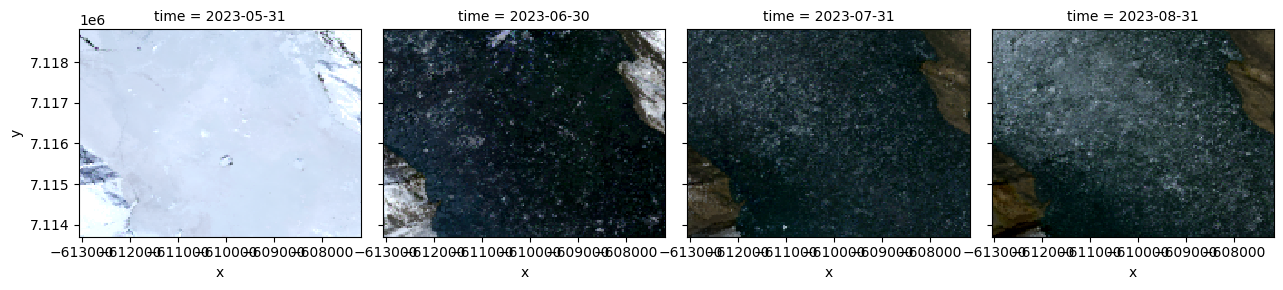

In [ ]:
ts_local.plot.imshow(col="time", col_wrap=5, robust=True)

# save image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import os

# Loop over each time step in the DataArray
for i, time_step in enumerate(ts_local['time']):
    # Select the data for the current time step
    img_data = ts_local.sel(time=time_step)

    # Create the plot and get the current axis
    fig, ax = plt.subplots()
    img_data.plot.imshow(ax=ax, rgb="band", robust=True)
    # Remove the x and y axis labels and ticks
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove the title
    ax.set_title('')

    # Save the current figure as a separate file
    path = '/content/drive/MyDrive/icebergtrack/iceberg_sentinel/'
    filename = f"{i}.png"
    plt.savefig(os.path.join(path, filename), dpi=500)
    plt.close()  # Close the figure to free memory

    # Optionally, print the filename to confirm saving
    print(f"Saved {filename}")

# download sentinel-1-rtc

In [5]:
catalog = pystac_client.Client.open('https://planetarycomputer.microsoft.com/api/stac/v1')
search = catalog.search(
    collections=['sentinel-1-rtc'],
    bbox=bbox,
    datetime="2023-05-01/2023-09-01",
)

items = pc.sign(search)
len(items)

30

In [6]:
stack = stackstac.stack(items, bounds_latlon=bbox, epsg=32627)
# stack = stack.assign_coords(band=stack.common_name.fillna(stack.band).rename("band"))
# stack.band

## version 1

In [ ]:
# Make a bitmask---when we bitwise-and it with the data, it leaves just the 4 bits we care about
# mask_bitfields = [1, 2, 3, 4]  # dilated cloud, cirrus, cloud, cloud shadow
# bitmask = 0
# for field in mask_bitfields:
#     bitmask |= 1 << field

In [7]:
qa = stack.sel(band=['hh', 'hv']).astype("uint16")

# bad = qa & bitmask  # just look at those 4 bits

# good = stack.where(bad == 0)  # mask pixels where any one of those bits are set

In [8]:
composites = qa.resample(time="M").median("time")
rgb = composites.sel(band=['hh', 'hv'])
# cleaned = rgb.ffill("time")[1:]

# rgb = composites.sel(band=['hh', 'hv']).assign_coords(band=['hh', 'hv', 'dummy_band'])
# rgb['dummy_band'] = 0  # or replace with any other logic to mimic a third band

In [19]:
quarterly = rgb.resample(time="M").median(dim='time')
ts = quarterly.persist()
ts_local = ts.compute()

KeyboardInterrupt: 

ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.

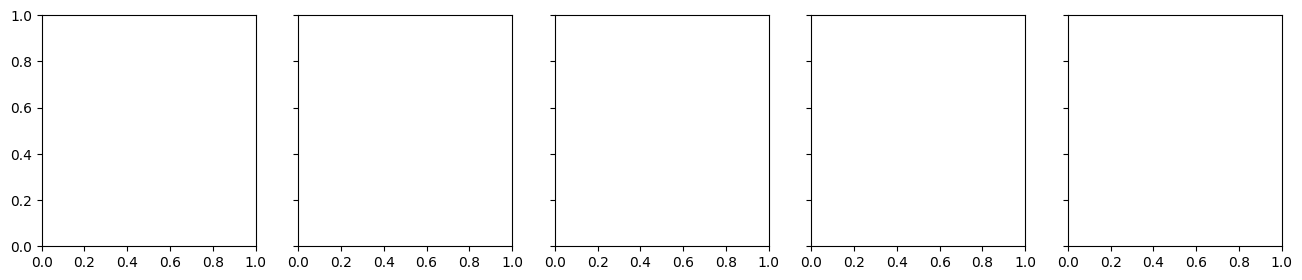

In [ ]:
# ts_local.plot.imshow(col="time", col_wrap=5, robust=True)

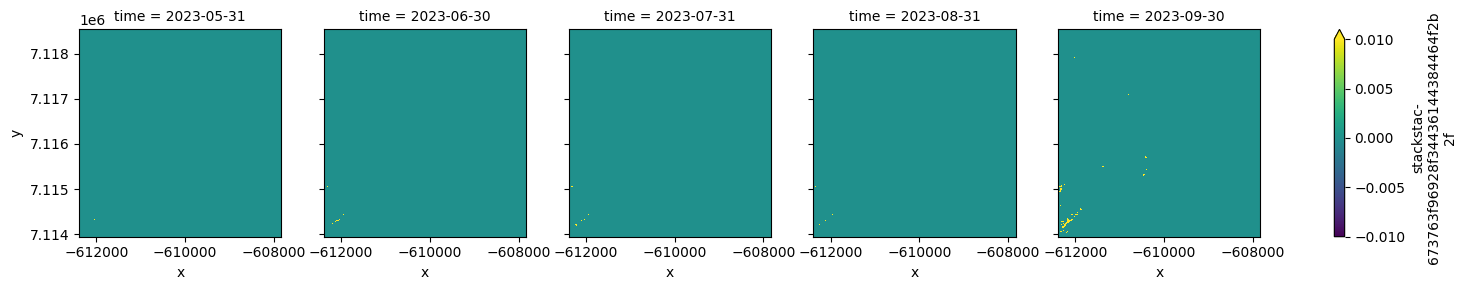

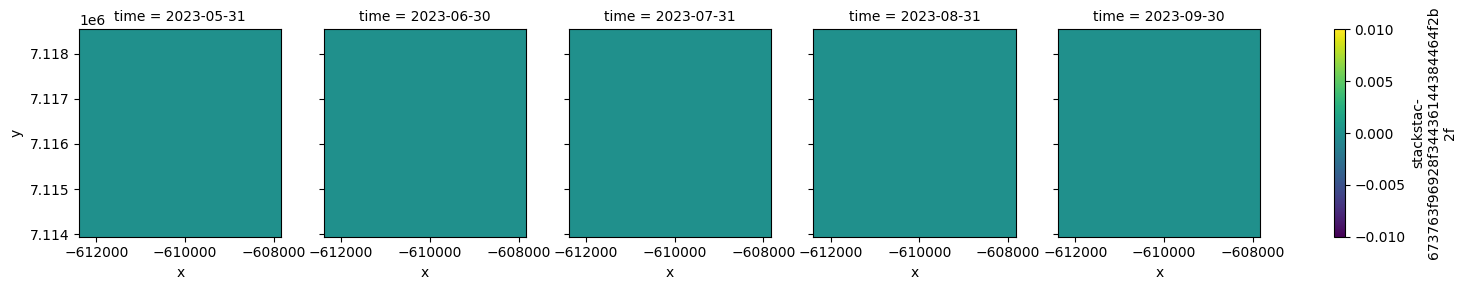

In [ ]:
for band in rgb.band.values:
    rgb.sel(band=band).plot.imshow(col="time", col_wrap=5, robust=True, vmin=0.0, vmax=0.01) # vmin, vmax

## version 2

In [9]:
import numpy as np
def power_to_db(input_arr):
    return (10*np.log10(np.abs(input_arr)))

In [10]:
da_hh = stack.sel(band='hh')

In [11]:
da_hv = stack.sel(band='hv')

In [12]:
da_asc = stack.where(stack['sat:orbit_state'] == 'ascending', drop=True)
da_desc = stack.where(stack['sat:orbit_state'] == 'descending', drop=True)
# da_asc

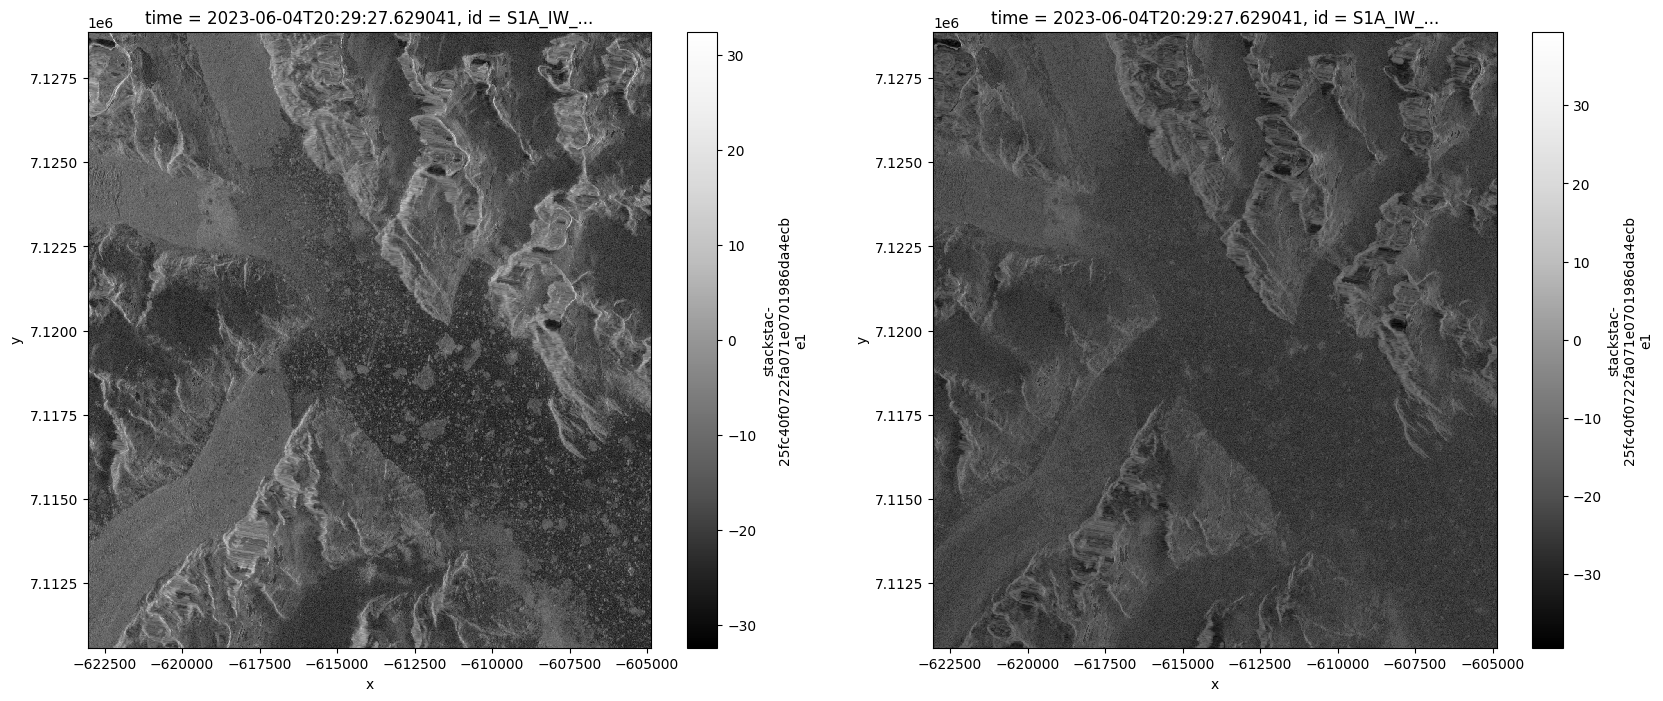

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(20,8))
# fig, axs = plt.subplots(ncols=2)

t = 2
power_to_db(da_asc.sel(band='hh').isel(time=t)).plot(cmap=plt.cm.Greys_r, ax=axs[0]);
power_to_db(da_asc.sel(band='hv').isel(time=t)).plot(cmap=plt.cm.Greys_r, ax=axs[1]);
# power_to_db(da_asc.sel(band='hh').isel(time=0)).plot(cmap=plt.cm.viridis, ax=axs[0]);
# power_to_db(da_asc.sel(band='hv').isel(time=0)).plot(cmap=plt.cm.viridis, ax=axs[1]);

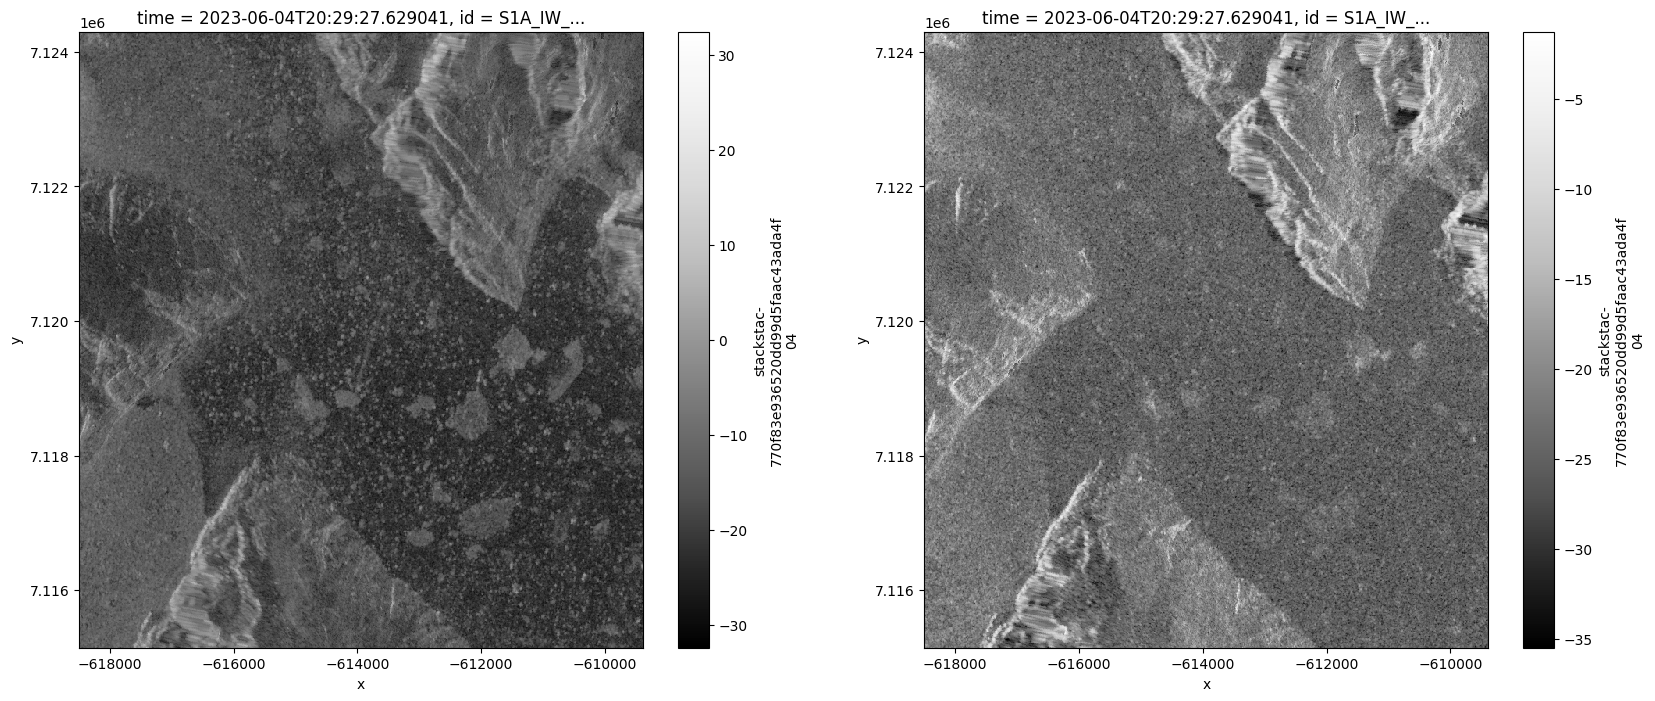

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(20,8))
# fig, axs = plt.subplots(ncols=2)

t = 2
power_to_db(da_asc.sel(band='hh').isel(time=t)).plot(cmap=plt.cm.Greys_r, ax=axs[0]);
power_to_db(da_asc.sel(band='hv').isel(time=t)).plot(cmap=plt.cm.Greys_r, ax=axs[1]);